# Analise Funil SMS com evento PIX

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df=pd.read_csv("funil pix ultimo mes 1509-2022 a 1510-2022.csv")
df

,produtor,empresa,site,squad,lojas_criadas,pedidos_aprovados,total_aprovado,total_parceiro,sum(orders_pix_approved),sum(t.orders_pix_amount),sum(orders_pix_approved_amount),funnel_id,config_id,message,created_at,deleted_at,evento,evento_criado,evento_deletado,mensagens_enviadas
0,LUCAS LOUREIRO FIGARO DA COSTA PINTO,Digital Bros Agency Criação E Lançamento De In...,Manifestando o Segredo,CSM 3,5,3580,1155881.20,1085286.45,595435.00,2820,1930,1518,6,"Olá, agora pague o pix do box do milhão. Seu c...",2022-08-08 03:37:08,2022-08-08 03:37:28,PIX Gerado,2021-12-13 16:39:33,NaN,2
1,Roberto Costa (P),Conecta Ideias - Marketing LTDA,My History,Key account 1,13,0,0.00,NaN,0.00,0,0,830,6,{Primeiro_nome}; Para finalizar o pedido de VI...,2022-05-18 19:04:32,NaN,PIX Gerado,2021-12-13 16:39:33,NaN,420
2,Lucas Vsjgyn,Leemarii,Leemarii,Farmer 1,13,8471,808422.79,774543.52,433858.39,8041,4601,1448,6,"Oi {Primeiro_nome}, Recebemos Seu Pedido Com S...",2022-09-24 01:59:26,2022-10-01 06:35:47,PIX Gerado,2021-12-13 16:39:33,NaN,43
3,Thiago Carboni Reiter,THP COMMERCE,Bazar Do Brasil,Farmer 1,7,53200,8832661.25,8197834.75,1891295.00,18200,12250,645,6,Olá {Primeiro_nome} seu pix foi gerado com suc...,2022-01-31 21:41:19,2022-01-31 21:45:57,PIX Gerado,2021-12-13 16:39:33,NaN,174
4,DIEGO FERNANDES SPENCIERE,D F SPENCIERE SOM AUTOMOTIVO,Femina Shop,Key account 1,8,5553,916186.14,851269.66,127139.56,1530,836,1185,6,{Primeiro_nome} Pague seu pix no valor: {Valor...,2022-01-31 18:45:33,2022-01-31 18:48:36,PIX Gerado,2021-12-13 16:39:33,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Marcela Pereira,Amezz,Amezz,Farmer 1,2,0,0.00,NaN,0.00,0,0,1505,6,"Olá {Primeiro_nome}, O seu pedido foi reservad...",2022-08-01 03:53:54,NaN,PIX Gerado,2021-12-13 16:39:33,NaN,26
85,Gabriel Lucas Taguti Oshiro,Loja Vou Levar Agora,Vou Levar Agora,Farmer 2,1,0,0.00,NaN,0.00,0,0,1508,6,{Primeiro_nome} Os seus produtos estão esperan...,2022-08-02 05:39:37,2022-08-02 20:29:04,PIX Gerado,2021-12-13 16:39:33,NaN,111
86,MICHEL RODRIGUES WOLFER,AUTOMOTIVE TINTAS LTDA,Conforto e Ofertas,Farmer 1,2,8,1336.88,1323.76,1336.88,8,8,1566,6,{Primeiro_nome} Volte e finalize seu pedido ai...,2022-09-04 19:23:40,2022-09-04 21:01:23,PIX Gerado,2021-12-13 16:39:33,NaN,1
87,LARYSSA FERREIRA COSTA ALVAREZ,LA MARKETING,Cardápios Flexíveis,Farmer 1,1,0,0.00,NaN,0.00,3,0,1622,6,"Olá {Primeiro_nome}, segue seu código Pix para...",2022-09-28 20:33:43,NaN,PIX Gerado,2021-12-13 16:39:33,NaN,0


In [103]:
df.drop(columns="evento_deletado", axis=1, inplace=True)
df.isnull().sum()

produtor                            0
empresa                             0
site                                0
squad                               0
lojas_criadas                       0
pedidos_aprovados                   0
total_aprovado                      0
total_parceiro                     37
sum(orders_pix_approved)            0
sum(t.orders_pix_amount)            0
sum(orders_pix_approved_amount)     0
funnel_id                           0
config_id                           0
message                             0
created_at                          0
deleted_at                         48
evento                              0
evento_criado                       0
mensagens_enviadas                  0
dtype: int64

### Período da Análise de Processamento foi determinado anteriormente, na extração de dados via MySQL: Entre 15/09/2022 a 15/10/2022

In [104]:
df.columns

Index(['produtor', 'empresa', 'site', 'squad', 'lojas_criadas',
       'pedidos_aprovados', 'total_aprovado', 'total_parceiro',
       'sum(orders_pix_approved)', 'sum(t.orders_pix_amount)',
       'sum(orders_pix_approved_amount)', 'funnel_id', 'config_id', 'message',
       'created_at', 'deleted_at', 'evento', 'evento_criado',
       'mensagens_enviadas'],
      dtype='object')

In [105]:
df["conversao_pix"] = round(df['sum(orders_pix_approved_amount)']/df['sum(t.orders_pix_amount)']*100,2)
df['custo_sms'] = df['mensagens_enviadas']*0.08
df['pedidos_pix_perdidos'] = df['sum(t.orders_pix_amount)'] - df['sum(orders_pix_approved_amount)']
df

,produtor,empresa,site,squad,lojas_criadas,pedidos_aprovados,total_aprovado,total_parceiro,sum(orders_pix_approved),sum(t.orders_pix_amount),...,config_id,message,created_at,deleted_at,evento,evento_criado,mensagens_enviadas,conversao_pix,custo_sms,pedidos_pix_perdidos
0,LUCAS LOUREIRO FIGARO DA COSTA PINTO,Digital Bros Agency Criação E Lançamento De In...,Manifestando o Segredo,CSM 3,5,3580,1155881.20,1085286.45,595435.00,2820,...,6,"Olá, agora pague o pix do box do milhão. Seu c...",2022-08-08 03:37:08,2022-08-08 03:37:28,PIX Gerado,2021-12-13 16:39:33,2,68.44,0.16,890
1,Roberto Costa (P),Conecta Ideias - Marketing LTDA,My History,Key account 1,13,0,0.00,NaN,0.00,0,...,6,{Primeiro_nome}; Para finalizar o pedido de VI...,2022-05-18 19:04:32,NaN,PIX Gerado,2021-12-13 16:39:33,420,NaN,33.60,0
2,Lucas Vsjgyn,Leemarii,Leemarii,Farmer 1,13,8471,808422.79,774543.52,433858.39,8041,...,6,"Oi {Primeiro_nome}, Recebemos Seu Pedido Com S...",2022-09-24 01:59:26,2022-10-01 06:35:47,PIX Gerado,2021-12-13 16:39:33,43,57.22,3.44,3440
3,Thiago Carboni Reiter,THP COMMERCE,Bazar Do Brasil,Farmer 1,7,53200,8832661.25,8197834.75,1891295.00,18200,...,6,Olá {Primeiro_nome} seu pix foi gerado com suc...,2022-01-31 21:41:19,2022-01-31 21:45:57,PIX Gerado,2021-12-13 16:39:33,174,67.31,13.92,5950
4,DIEGO FERNANDES SPENCIERE,D F SPENCIERE SOM AUTOMOTIVO,Femina Shop,Key account 1,8,5553,916186.14,851269.66,127139.56,1530,...,6,{Primeiro_nome} Pague seu pix no valor: {Valor...,2022-01-31 18:45:33,2022-01-31 18:48:36,PIX Gerado,2021-12-13 16:39:33,0,54.64,0.00,694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Marcela Pereira,Amezz,Amezz,Farmer 1,2,0,0.00,NaN,0.00,0,...,6,"Olá {Primeiro_nome}, O seu pedido foi reservad...",2022-08-01 03:53:54,NaN,PIX Gerado,2021-12-13 16:39:33,26,NaN,2.08,0
85,Gabriel Lucas Taguti Oshiro,Loja Vou Levar Agora,Vou Levar Agora,Farmer 2,1,0,0.00,NaN,0.00,0,...,6,{Primeiro_nome} Os seus produtos estão esperan...,2022-08-02 05:39:37,2022-08-02 20:29:04,PIX Gerado,2021-12-13 16:39:33,111,NaN,8.88,0
86,MICHEL RODRIGUES WOLFER,AUTOMOTIVE TINTAS LTDA,Conforto e Ofertas,Farmer 1,2,8,1336.88,1323.76,1336.88,8,...,6,{Primeiro_nome} Volte e finalize seu pedido ai...,2022-09-04 19:23:40,2022-09-04 21:01:23,PIX Gerado,2021-12-13 16:39:33,1,100.00,0.08,0
87,LARYSSA FERREIRA COSTA ALVAREZ,LA MARKETING,Cardápios Flexíveis,Farmer 1,1,0,0.00,NaN,0.00,3,...,6,"Olá {Primeiro_nome}, segue seu código Pix para...",2022-09-28 20:33:43,NaN,PIX Gerado,2021-12-13 16:39:33,0,0.00,0.00,3


In [106]:
# Total
total = len(df)
print(f"Diagnosticou-se que {total} parceiros criaram o funil personalizado com o evento 'PIX Gerado'.")

# Churn
churn = df[df['total_aprovado'] < 1000]
n_churn = len(churn) 
print(f"Nessa amostra há {n_churn} parceiros que não processam ou processaram menos que R$1000 no período da análise.")


Diagnosticou-se que 89 parceiros criaram o funil personalizado com o evento 'PIX Gerado'.
Nessa amostra há 42 parceiros que não processam ou processaram menos que R$1000 no período da análise.


### Representatividade TPV

In [107]:
TPV_df = df.groupby(['produtor','empresa','squad'],as_index=False).sum().sort_values(by='total_aprovado', ascending=False).drop(columns=['funnel_id','config_id'])
TPV_df = TPV_df[TPV_df['total_aprovado'] > 0]
TPV_df

,produtor,empresa,squad,lojas_criadas,pedidos_aprovados,total_aprovado,total_parceiro,sum(orders_pix_approved),sum(t.orders_pix_amount),sum(orders_pix_approved_amount),mensagens_enviadas,conversao_pix,custo_sms,pedidos_pix_perdidos
33,INLOVE PRODUTOS NATURAIS E IMPORTADOS LTDA (P),INLOVE PRODUTOS NATURAIS E IMPORTADOS LTDA (P),Key account 1,10,147100456,4.620190e+10,3.806199e+10,5.017812e+09,31292512,18451681,16031,58.97,1282.48,12840831
61,MAYCON VELOSO DA ROCHA,ROCHA ECOM,Key account 2,11,20308432,3.141523e+09,2.938278e+09,6.173416e+08,7642764,4318252,9034,56.50,722.72,3324512
88,WITLEY PAULO MENDES SILVA,WA INTERMEDIACAO DE NEGOCIOS DIGITAIS LTDA,Key account 3,3,1768968,5.885332e+08,5.266700e+08,4.570517e+06,23700,18012,948,76.00,75.84,5688
2,ANDRE LUIS RODRIGUES,ALLREPRES,CSM 7,7,1874960,3.131470e+08,2.837199e+08,7.826435e+07,1676255,611400,5095,36.47,407.60,1064855
67,Marcus Maia,LOTO M. NEGOCIOS DIGITAIS,CSM 4,12,1024296,2.113946e+08,1.977950e+08,6.739216e+07,424177,357110,870,84.19,69.60,67067
50,LUIZ DE LIMA,BARATO PRATICO,CSM 4,5,99186,6.778902e+07,6.052717e+07,1.536532e+07,42090,26169,183,62.17,14.64,15921
34,JADERSON SCHNEIDER,JS MARKETING,Farmer 1,5,265601,4.210916e+07,3.771331e+07,1.921513e+07,399400,131802,1996,33.00,159.68,267598
49,LUCCA PROTASIO DAZZANI,INOVATI,CSM 4,8,323832,4.191879e+07,3.899833e+07,9.439839e+06,122364,70761,309,57.83,24.72,51603
31,Guilherme Fagundes Peres,CYGNUS,Farmer 1,3,152640,2.937674e+07,2.715501e+07,7.119761e+06,54240,39840,239,73.45,19.12,14400
84,Thiago Carboni Reiter,THP COMMERCE,Farmer 1,7,53200,8.832661e+06,8.197835e+06,1.891295e+06,18200,12250,174,67.31,13.92,5950


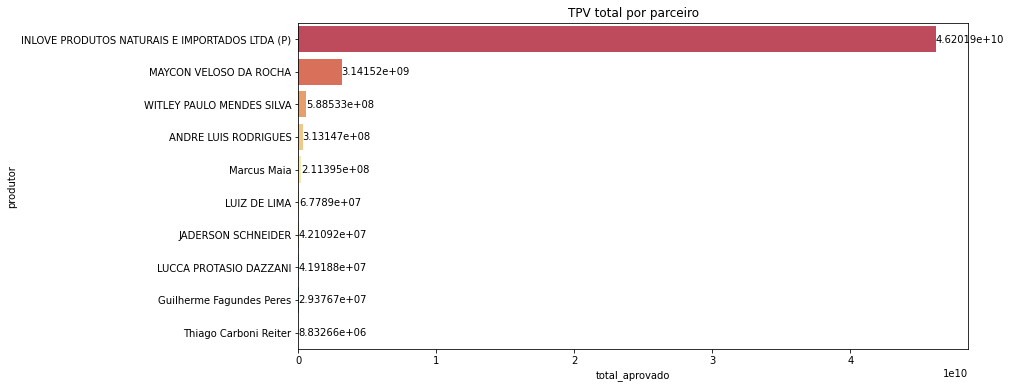

In [108]:
plt.figure(figsize=(12,6))
plt.title("TPV total por parceiro")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['total_aprovado'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

In [109]:
TPV_total = TPV_df.total_aprovado.sum()
print(f"Todos os parceiros representam o total de R${round(TPV_total,2)}")

Todos os parceiros representam o total de R$50671258822.4


### Contribuição do PIX no TPV de cada PARCEIRO

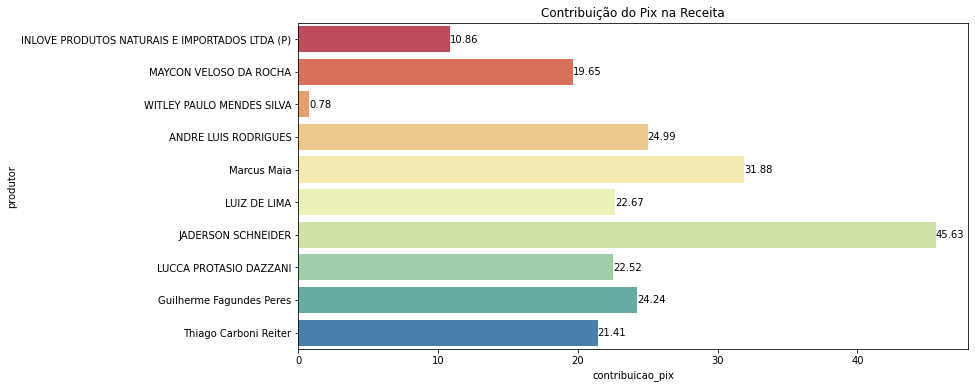

In [110]:
TPV_df['contribuicao_pix'] = round(TPV_df['sum(orders_pix_approved)']/TPV_df['total_aprovado']*100,2)

plt.figure(figsize=(12,6))
plt.title("Contribuição do Pix na Receita")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['contribuicao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

### Conversão PIX

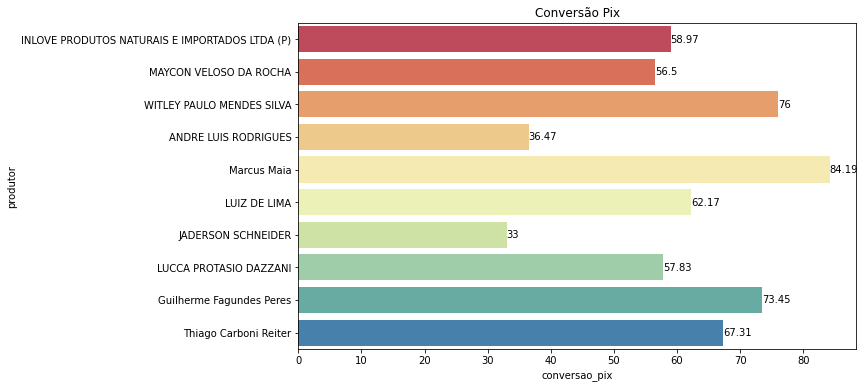

In [111]:
plt.figure(figsize=(10,6))
plt.title("Conversão Pix")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['conversao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

### Disparos de SMS

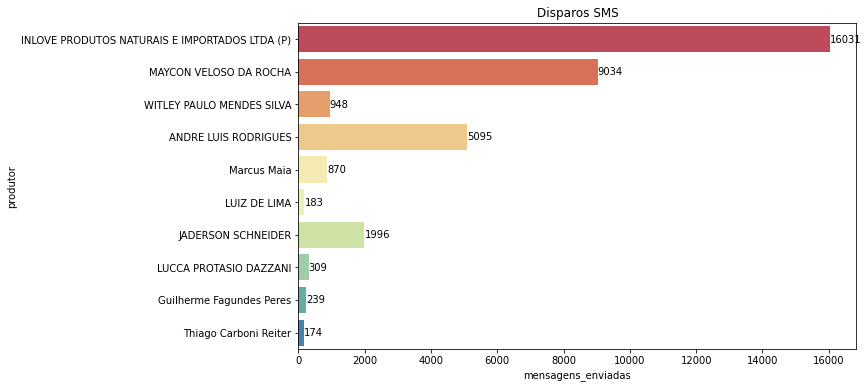

In [112]:
plt.figure(figsize=(10,6))
plt.title("Disparos SMS")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['mensagens_enviadas'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

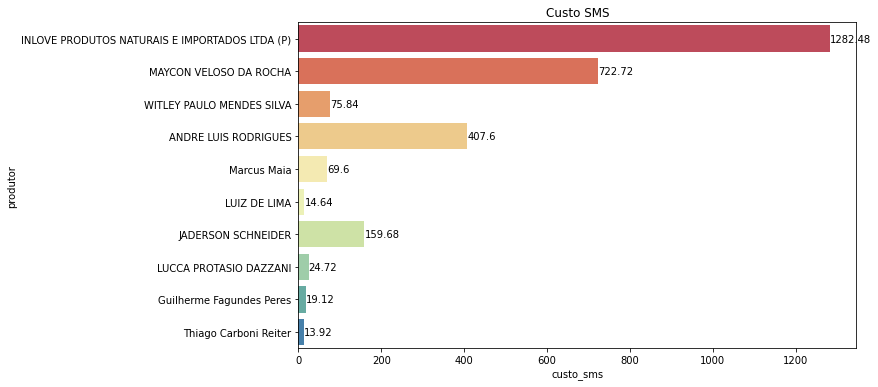

In [113]:
plt.figure(figsize=(10,6))
plt.title("Custo SMS")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['custo_sms'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

### Pix Perdido

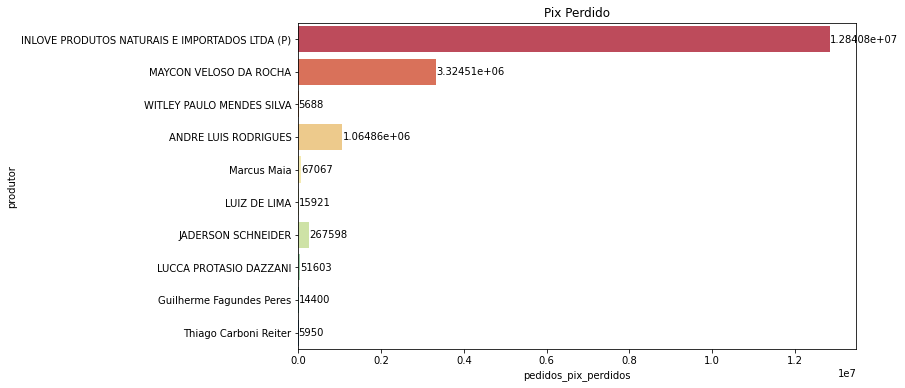

In [114]:
plt.figure(figsize=(10,6))
plt.title("Pix Perdido")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['pedidos_pix_perdidos'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

## Parceiros com o Funil Desativado

* Período da Exclusão do Funil Personalizado: Considera todo o período da empresa (sem filtro)

In [115]:
deleted = df.dropna()

In [116]:
amount_deleted = len(deleted)
print(f"Desses {total} parceiros, {amount_deleted} desativaram o funil de sms personalizado.")

Desses 89 parceiros, 16 desativaram o funil de sms personalizado.


#### Representatividade TPV

In [117]:
deleted_TPV = deleted.total_aprovado.sum()
print(f"Estes {amount_deleted} desativados somam o total de R${deleted_TPV}")
# Churn
churn = deleted[deleted['total_aprovado'] < 1000]
n_churn = len(churn) 
print(f"Nessa amostra há {n_churn} parceiros que não processam ou processaram menos que R$1000 no período da análise.")

Estes 16 desativados somam o total de R$399899769.35
Nessa amostra há 0 parceiros que não processam ou processaram menos que R$1000 no período da análise.


In [118]:
TPV_df = deleted.groupby(['produtor','empresa','squad'],as_index=False).sum().sort_values(by='total_aprovado', ascending=False).drop(columns=['funnel_id','config_id'])
TPV_df = TPV_df[TPV_df['total_aprovado'] > 0]
TPV_df

,produtor,empresa,squad,lojas_criadas,pedidos_aprovados,total_aprovado,total_parceiro,sum(orders_pix_approved),sum(t.orders_pix_amount),sum(orders_pix_approved_amount),mensagens_enviadas,conversao_pix,custo_sms,pedidos_pix_perdidos
0,ANDRE LUIS RODRIGUES,ALLREPRES,CSM 7,7,1874960,3.131470e+08,2.837199e+08,78264345.95,1676255,611400,5095,36.47,407.60,1064855
9,JADERSON SCHNEIDER,JS MARKETING,Farmer 1,5,265601,4.210916e+07,3.771331e+07,19215134.00,399400,131802,1996,33.00,159.68,267598
8,Guilherme Fagundes Peres,CYGNUS,Farmer 1,3,152640,2.937674e+07,2.715501e+07,7119760.80,54240,39840,239,73.45,19.12,14400
14,Thiago Carboni Reiter,THP COMMERCE,Farmer 1,7,53200,8.832661e+06,8.197835e+06,1891295.00,18200,12250,174,67.31,13.92,5950
11,LUCAS LOUREIRO FIGARO DA COSTA PINTO,Digital Bros Agency Criação E Lançamento De In...,CSM 3,5,3580,1.155881e+06,1.085286e+06,595435.00,2820,1930,2,68.44,0.16,890
5,Danilo Rodrigues,RODS MARKETING,Farmer 1,7,7203,1.002548e+06,9.150897e+05,242075.68,3430,2058,341,60.00,27.28,1372
6,GUILHERME DE OLIVEIRA MIRANDA,Sivali Store,Farmer 1,3,6119,9.554692e+05,8.827734e+05,254966.07,4220,1899,211,45.00,16.88,2321
4,DIEGO FERNANDES SPENCIERE,D F SPENCIERE SOM AUTOMOTIVO,Key account 1,8,5553,9.161861e+05,8.512697e+05,127139.56,1530,836,0,54.64,0.00,694
12,Lucas Vsjgyn,Leemarii,Farmer 1,13,8471,8.084228e+05,7.745435e+05,433858.39,8041,4601,43,57.22,3.44,3440
15,UENIO MENDES MARTINEZ,MARTINEZ MIDIA,CSM 3,4,4466,6.644823e+05,6.066955e+05,108058.02,1365,847,6,62.05,0.48,518


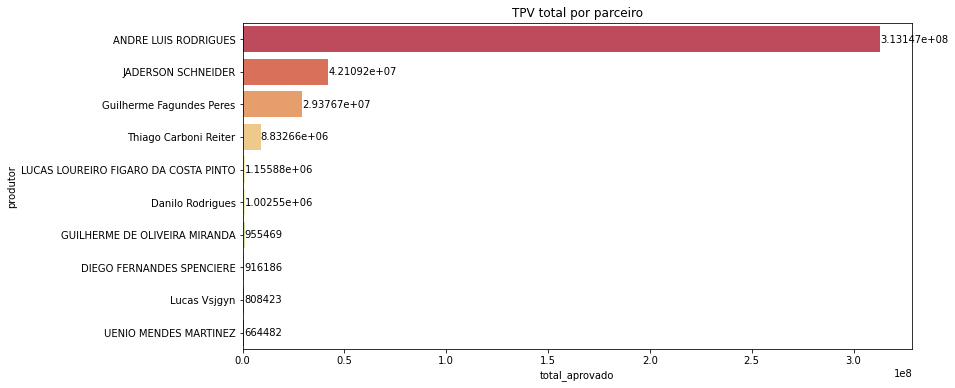

In [119]:
plt.figure(figsize=(12,6))
plt.title("TPV total por parceiro")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['total_aprovado'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

#### Contribuição do PIX no TPV de cada PARCEIRO que desativou o funil personalizado

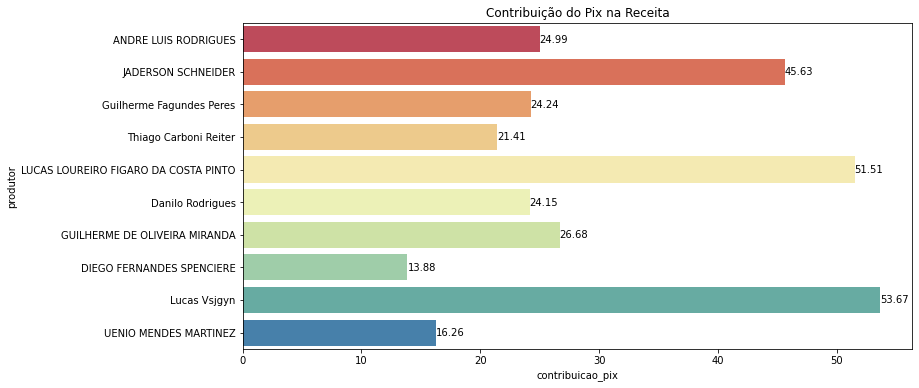

In [120]:
TPV_df['contribuicao_pix'] = round(TPV_df['sum(orders_pix_approved)']/TPV_df['total_aprovado']*100,2)

plt.figure(figsize=(12,6))
plt.title("Contribuição do Pix na Receita")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['contribuicao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

#### Conversão do PIX de cada PARCEIRO que desativou o funil personalizado

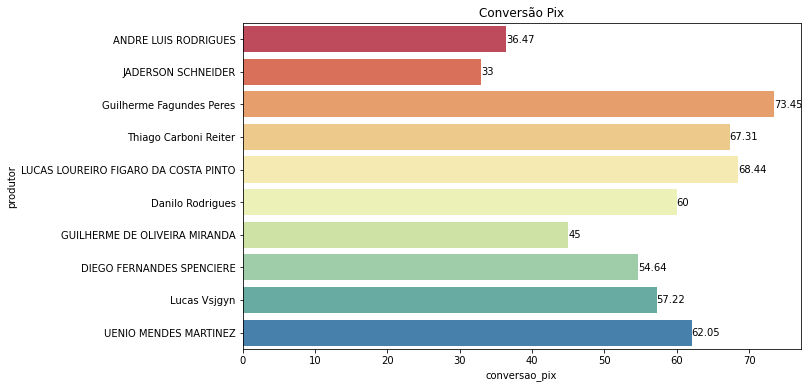

In [121]:
plt.figure(figsize=(10,6))
plt.title("Conversão Pix")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['conversao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

### Disparos de SMS

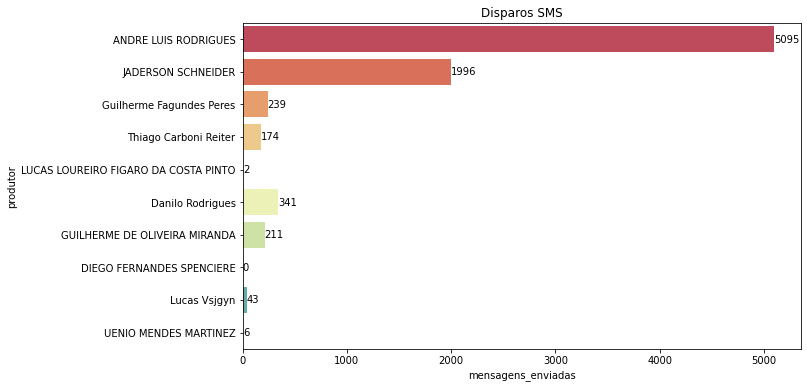

In [122]:
plt.figure(figsize=(10,6))
plt.title("Disparos SMS")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['mensagens_enviadas'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

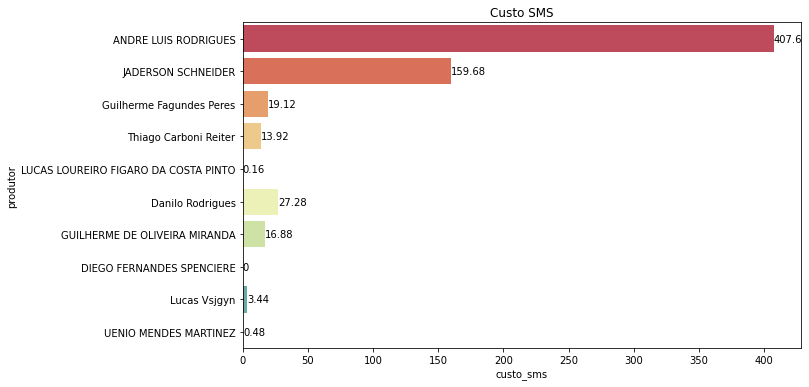

In [123]:
plt.figure(figsize=(10,6))
plt.title("Custo SMS")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['custo_sms'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

### Pix Perdido

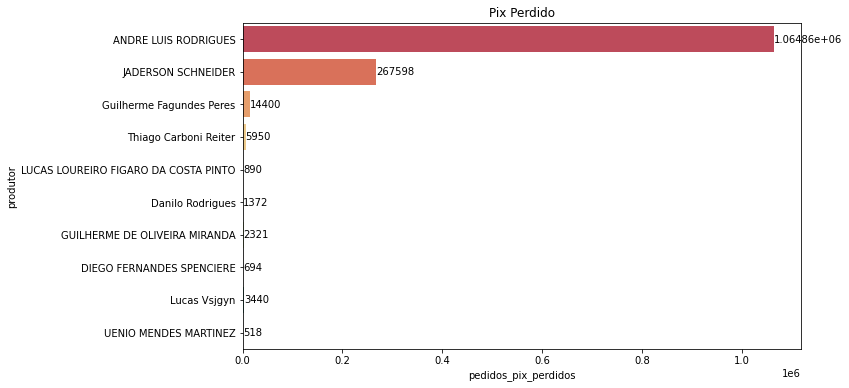

In [124]:
plt.figure(figsize=(10,6))
plt.title("Pix Perdido")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['pedidos_pix_perdidos'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

## Parceiros que mantiveram o funil automático ativo

In [125]:
active = df.drop(deleted.index)
active

,produtor,empresa,site,squad,lojas_criadas,pedidos_aprovados,total_aprovado,total_parceiro,sum(orders_pix_approved),sum(t.orders_pix_amount),...,config_id,message,created_at,deleted_at,evento,evento_criado,mensagens_enviadas,conversao_pix,custo_sms,pedidos_pix_perdidos
1,Roberto Costa (P),Conecta Ideias - Marketing LTDA,My History,Key account 1,13,0,0.000000e+00,NaN,0.00,0,...,6,{Primeiro_nome}; Para finalizar o pedido de VI...,2022-05-18 19:04:32,NaN,PIX Gerado,2021-12-13 16:39:33,420,NaN,33.60,0
5,Marcus Maia,LOTO M. NEGOCIOS DIGITAIS,Programa LotoMais,CSM 4,12,1024296,2.113946e+08,1.977950e+08,67392161.72,424177,...,6,PROGRAMA LOTOMAIS - Para finalizar seu pedido...,2022-02-10 06:34:07,NaN,PIX Gerado,2021-12-13 16:39:33,870,84.19,69.60,67067
6,Fabio Rodrigues,LAURENS,OutBela,Farmer 2,8,0,0.000000e+00,NaN,0.00,0,...,6,Olá {Primeiro_nome} obrigado pela compra na {N...,2022-05-10 22:24:51,NaN,PIX Gerado,2021-12-13 16:39:33,0,NaN,0.00,0
7,DEIVID MONTEIRO DOS SANTOS (P),DEIVID MONTEIRO DOS SANTOS (P),Distribuidora katarina,CSM 4,6,101,1.477732e+05,1.335933e+05,7973.51,29,...,6,segue seu código pix {Codigo_pix},2022-03-08 21:05:27,NaN,PIX Gerado,2021-12-13 16:39:33,1,24.14,0.08,22
8,FPG DE PAULA NEGOCIOS ONLINE LTDA (P),SLT NEGOCIOS ONLINE,Solitarystore,CSM 1,5,543,7.105688e+04,6.605312e+04,22401.97,377,...,6,"Olá {Primeiro_nome}, pague seu pix agora mesmo...",2022-10-05 16:12:19,NaN,PIX Gerado,2021-12-13 16:39:33,1,48.81,0.08,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Matheus Moyano Portugal,Click Preços,Click Preços,Farmer 1,1,405,5.165400e+04,4.781415e+04,3810.00,60,...,6,"Olá, {Primeiro_nome}. Parabéns pela compra da ...",2022-09-08 18:21:32,NaN,PIX Gerado,2021-12-13 16:39:33,15,50.00,1.20,30
84,Marcela Pereira,Amezz,Amezz,Farmer 1,2,0,0.000000e+00,NaN,0.00,0,...,6,"Olá {Primeiro_nome}, O seu pedido foi reservad...",2022-08-01 03:53:54,NaN,PIX Gerado,2021-12-13 16:39:33,26,NaN,2.08,0
85,Gabriel Lucas Taguti Oshiro,Loja Vou Levar Agora,Vou Levar Agora,Farmer 2,1,0,0.000000e+00,NaN,0.00,0,...,6,{Primeiro_nome} Os seus produtos estão esperan...,2022-08-02 05:39:37,2022-08-02 20:29:04,PIX Gerado,2021-12-13 16:39:33,111,NaN,8.88,0
87,LARYSSA FERREIRA COSTA ALVAREZ,LA MARKETING,Cardápios Flexíveis,Farmer 1,1,0,0.000000e+00,NaN,0.00,3,...,6,"Olá {Primeiro_nome}, segue seu código Pix para...",2022-09-28 20:33:43,NaN,PIX Gerado,2021-12-13 16:39:33,0,0.00,0.00,3


In [126]:
amount_active = len(active)
print(f"Outros {amount_active} manteram o funil de sms personalizado ativo.")

Outros 73 manteram o funil de sms personalizado ativo.


#### Representatividade TPV

In [127]:
TPV_df = active.groupby(['produtor','empresa','squad'],as_index=False).sum().sort_values(by='total_aprovado', ascending=False).drop(columns=['funnel_id','config_id'])
TPV_df = TPV_df[TPV_df['total_aprovado'] > 0]
TPV_df

,produtor,empresa,squad,lojas_criadas,pedidos_aprovados,total_aprovado,total_parceiro,sum(orders_pix_approved),sum(t.orders_pix_amount),sum(orders_pix_approved_amount),mensagens_enviadas,conversao_pix,custo_sms,pedidos_pix_perdidos
24,INLOVE PRODUTOS NATURAIS E IMPORTADOS LTDA (P),INLOVE PRODUTOS NATURAIS E IMPORTADOS LTDA (P),Key account 1,10,147100456,4.620190e+10,3.806199e+10,5.017812e+09,31292512,18451681,16031,58.97,1282.48,12840831
48,MAYCON VELOSO DA ROCHA,ROCHA ECOM,Key account 2,11,20308432,3.141523e+09,2.938278e+09,6.173416e+08,7642764,4318252,9034,56.50,722.72,3324512
72,WITLEY PAULO MENDES SILVA,WA INTERMEDIACAO DE NEGOCIOS DIGITAIS LTDA,Key account 3,3,1768968,5.885332e+08,5.266700e+08,4.570517e+06,23700,18012,948,76.00,75.84,5688
53,Marcus Maia,LOTO M. NEGOCIOS DIGITAIS,CSM 4,12,1024296,2.113946e+08,1.977950e+08,6.739216e+07,424177,357110,870,84.19,69.60,67067
38,LUIZ DE LIMA,BARATO PRATICO,CSM 4,5,99186,6.778902e+07,6.052717e+07,1.536532e+07,42090,26169,183,62.17,14.64,15921
37,LUCCA PROTASIO DAZZANI,INOVATI,CSM 4,8,323832,4.191879e+07,3.899833e+07,9.439839e+06,122364,70761,309,57.83,24.72,51603
18,GABRIEL ARAUJO FRUCHI,GABRIEL ARAUJO FRUCHI,Key account 1,8,62307,8.469351e+06,7.547688e+06,1.987047e+06,42435,18630,207,43.90,16.56,23805
43,MARISTELA MARIA MARTINI,INOVALABS LTDA,Farmer 1,4,13143,5.385368e+06,4.757924e+06,4.937117e+05,3707,2022,337,54.55,26.96,1685
26,JOAS FERNANDES DA PAZ,JF NEGOCIOS DIGITAIS,Farmer 1,5,11739,3.111275e+06,2.857177e+06,4.099914e+05,8190,1638,273,20.00,21.84,6552
60,Pedro Lucas Riciolli Santana,Portal da 44 Goiania,Farmer 2,1,1425,2.828646e+05,2.687341e+05,9.202916e+04,969,532,19,54.90,1.52,437


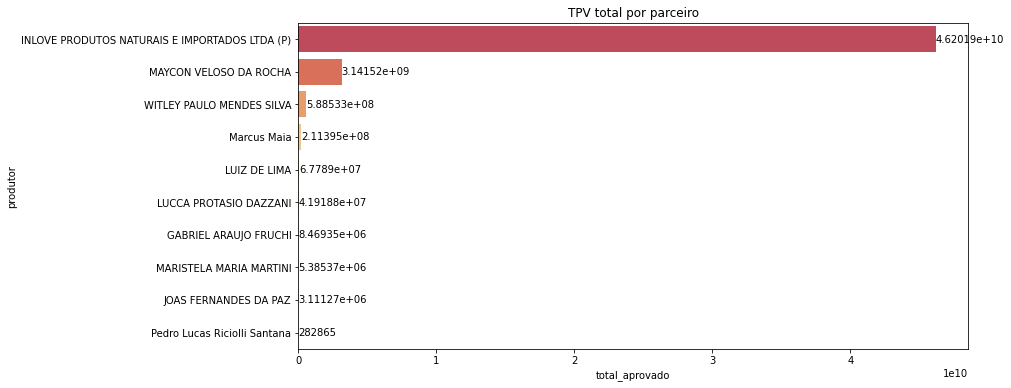

In [128]:
plt.figure(figsize=(12,6))
plt.title("TPV total por parceiro")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['total_aprovado'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

In [129]:
active_TPV = active.total_aprovado.sum()
print(f"Estes {amount_active} desativados somam o total de R${active_TPV}")
# Churn
churn = active[active['total_aprovado'] < 1000]
n_churn = len(churn) 
print(f"Nessa amostra há {n_churn} parceiros que não processam ou processaram menos que R$1000 no período da análise.")

Estes 73 desativados somam o total de R$50271359053.04999
Nessa amostra há 42 parceiros que não processam ou processaram menos que R$1000 no período da análise.


* **Apenas 31 parceiros mantiveram o funil personalizado ativo e continuam processando com a Appmax**

* **Nota-se que todos aqueles 42 parceiros classificados como churn anteriormente, se referem a parceiros que mantiveram o funil de SMS personalizado ativo.**

#### Contribuição do PIX no TPV de cada PARCEIRO que manteve o funil personalizado ativo

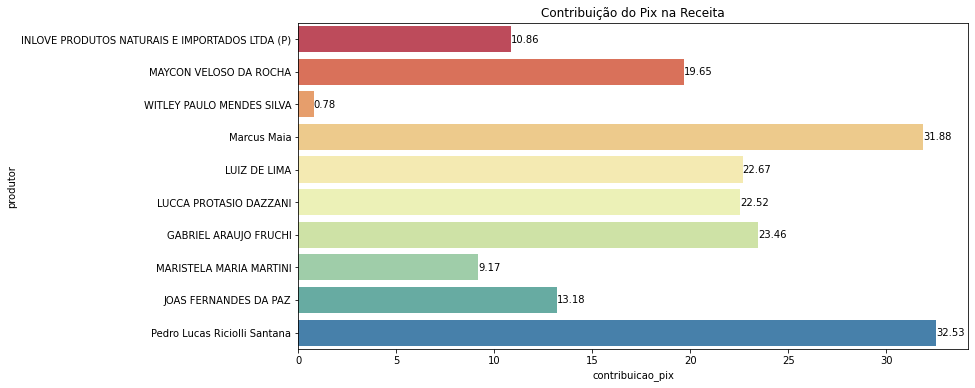

In [130]:
TPV_df['contribuicao_pix'] = round(TPV_df['sum(orders_pix_approved)']/TPV_df['total_aprovado']*100,2)

plt.figure(figsize=(12,6))
plt.title("Contribuição do Pix na Receita")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['contribuicao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

#### Conversão do PIX de cada PARCEIRO que manteve o funil personalizado ativo

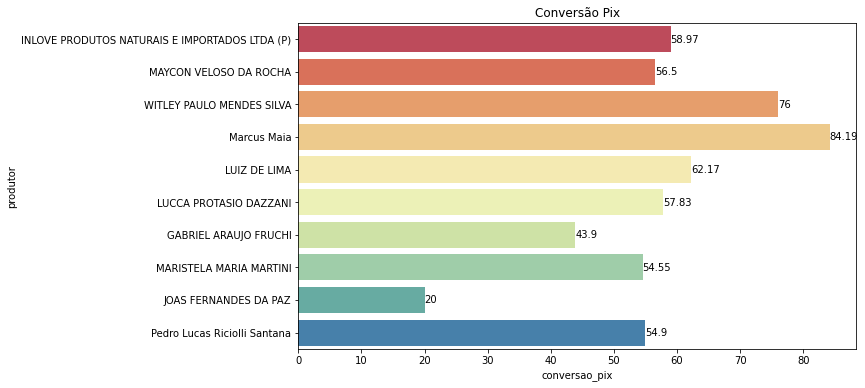

In [131]:
plt.figure(figsize=(10,6))
plt.title("Conversão Pix")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['conversao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

## Disparos de SMS

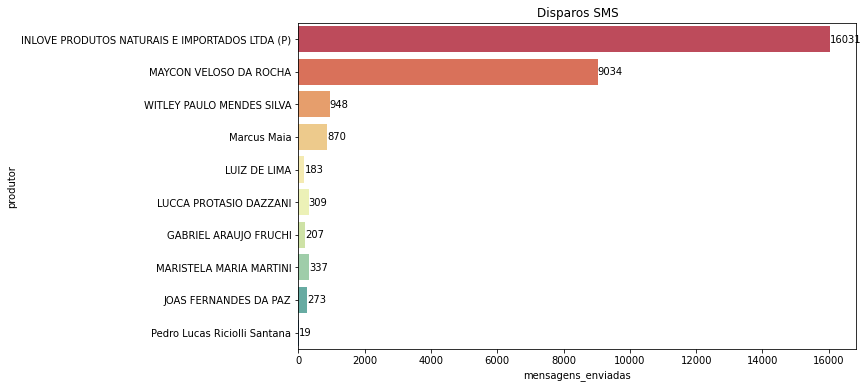

In [132]:
plt.figure(figsize=(10,6))
plt.title("Disparos SMS")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['mensagens_enviadas'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

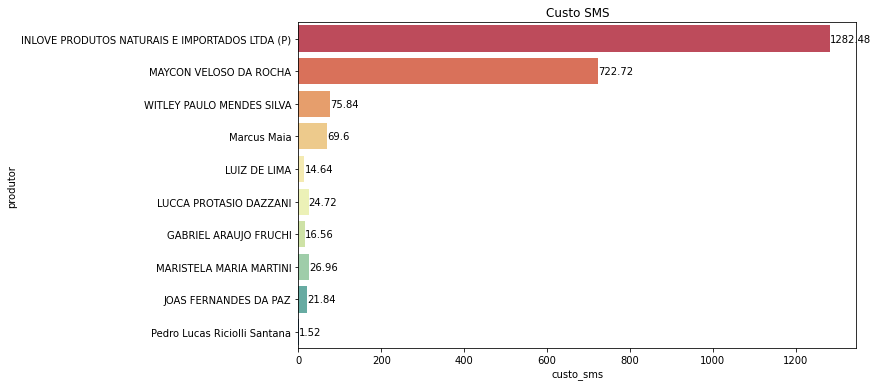

In [133]:
plt.figure(figsize=(10,6))
plt.title("Custo SMS")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['custo_sms'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)